Créer un nouveau notebook Python et taper le code suivant dans une nouvelle cellule :

In [1]:
import numpy as np
np.set_printoptions(threshold=np.nan,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1. Chargement des données et préparation : Dans un premier temps nous allons importer le jeu de données et analyser ses caractéristiques

## • Importer ce jeu de données avec la librairie pandas (c.f. read_csv)

## • Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array (c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents.

In [2]:
data_df = pd.read_csv('./credit_scoring.csv', sep=';')
data = data_df.values
#  variables caractéristiques 
X = data[:,0:13]
#  variable à prédire
Y = data[:,13]

## • Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), nombre d’exemples positifs et négatifs (c.f. hist).

In [3]:
data.shape

(4375, 14)

On a 4375 observations dans notre l’échantillon et 14 colonnes (c.à.d 13 variables caractéristiques + 1 variable à prédire)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6639B5A58>,
      dtype=object)

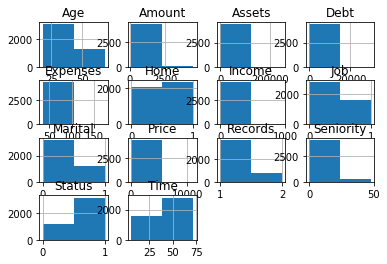

In [4]:
data_df.hist(bins = 2)

## • Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux partie une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite de test qui servira à son évaluation (c.f. train_test_split).

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

on split notre dataset en deux parties ( un tier pour le test, et deux tiers pour training)

# 2. Apprentissage et évaluation de modèles : Utiliser ensuite sur votre jeu de données les algorithmes d’apprentissage supervisé suivants :

## • Un arbre CART (random_state=1)

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.26038781163435 %
La precision d'un arbre CART: 79.81132075471699 %
Le rappel d'un arbre CART: 80.80229226361033 %


## • k-plus-proches-voisins avec k=5

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 72.02216066481995 %
La precision d'un arbre CART: 77.03952901597981 %
Le rappel d'un arbre CART: 87.48806112702961 %


Entre la presicion et le rappel, dans cette application de credit scoring, le presicion est le meilleur critère pour comparer les classifications. Car plus la précision est élevée, plus le faux négatif est faible, ce qui signifie que le montant des créances irrécouvrables (pertes financières) est faible pour la banque. En outre, la précision signifie la perte de client potentiel.

En basant sur l'accuracy et le rappel des deux algorithmes, on peut voir que la classification d'arbre CART est préférable de détecter les bons clients et que la classification KNN est préférable de réduire le taux de fausses évaluations des mauvais emprunteurs.

# 3. Normalisation des variables continues :

## MinMaxScaler:

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.26038781163435 %
La precision d'un arbre CART: 79.86767485822305 %
Le rappel d'un arbre CART: 80.70678127984718 %


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 74.65373961218836 %
La precision d'un arbre CART: 80.0 %
Le rappel d'un arbre CART: 86.72397325692455 %


# à conclure: chung ta làm table r KL

# 4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca = np.concatenate((X_scaled, X_pca), axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.33, random_state=42)

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 71.81440443213296 %
La precision d'un arbre CART: 80.01876172607881 %
Le rappel d'un arbre CART: 81.47086914995224 %


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("L’accuracy d'un arbre CART:", accuracy_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import precision_score
print("La precision d'un arbre CART:", precision_score(Y_test, Y_pred)*100, "%")
from sklearn.metrics import recall_score
print("Le rappel d'un arbre CART:", recall_score(Y_test, Y_pred)*100, "%")

L’accuracy d'un arbre CART: 74.65373961218836 %
La precision d'un arbre CART: 80.0 %
Le rappel d'un arbre CART: 86.72397325692455 %


# 5. Sélection de variables :

['Income' 'Price' 'Seniority' 'Amount' 'Age' 'Assets' 'Expenses' 'Records'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


ValueError: shape mismatch: objects cannot be broadcast to a single shape

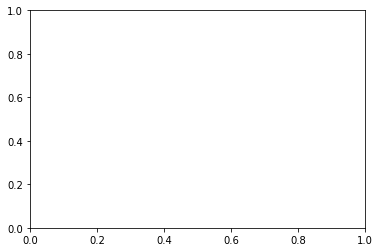

In [18]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_scaled, Y)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.asarray(list(data_df))
print(features[sorted_idx])
padding = np.arange(X_train.size/len(X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()